<a href="https://colab.research.google.com/github/IonaSantana/Artificial-Intelligence/blob/main/Flight_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fligh-Delay, qual compania eu devo ir?
O que é um atraso?
E quanto um atraso pode ser tolerado?

Quais voos atrasam mais?

In [37]:
import pandas as pd
import numpy as np
import seaborn as sn #correlacionar


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
airline = pd.read_csv("/content/drive/MyDrive/Flight Delays and Cancellations/airlines.csv")
airports = pd.read_csv("/content/drive/MyDrive/Flight Delays and Cancellations/airports.csv")
flights = pd.read_csv("/content/drive/MyDrive/Flight Delays and Cancellations/flights.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
airline.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [33]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [34]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [36]:
flights.shape #5819079 de informações em 31 colunas

(5819079, 31)

In [37]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

Coeficiente de Pearson -1 a 1, quanto mais próximo de um desse valores, maior a correlação 

Links: 

https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a

https://seaborn.pydata.org/generated/seaborn.heatmap.html

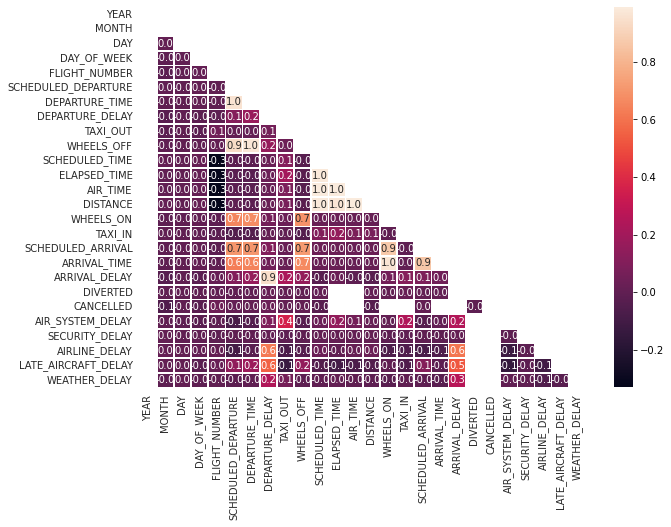

In [74]:
correlacao = flights.corr()
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
plot = sn.heatmap(correlacao, mask = mask,annot = True, fmt = ".1f", linewidths = .6)


Retirar as colunas com menos de +-0.6 de correlação

In [7]:
columns_corr = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'DISTANCE',
       'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']
#todas que estao relacionada com tempo, air_time só relaciona com distance, por isso foi retirada
y = flights['AIRLINE']
flights_time = flights[columns_corr]
flights_time .columns

Index(['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'DISTANCE', 'WHEELS_ON',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],
      dtype='object')

In [78]:
flights_time.shape

(5819079, 11)

In [79]:
flights_time.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,5,2354.0,-11.0,15.0,205.0,194.0,1448,404.0,430,408.0,-22.0
1,10,2.0,-8.0,14.0,280.0,279.0,2330,737.0,750,741.0,-9.0
2,20,18.0,-2.0,34.0,286.0,293.0,2296,800.0,806,811.0,5.0
3,20,15.0,-5.0,30.0,285.0,281.0,2342,748.0,805,756.0,-9.0
4,25,24.0,-1.0,35.0,235.0,215.0,1448,254.0,320,259.0,-21.0


In [80]:
y.head()

0    AS
1    AA
2    US
3    AA
4    AS
Name: AIRLINE, dtype: object

In [8]:
flights_time.isna().sum()

SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
DISTANCE                    0
WHEELS_ON               92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
dtype: int64

In [9]:
#apesar de retirar os valores NaN, ainda se tem muitos registro. E assim, podemos evitar cometer erros no modelo por falta de informação 
flights_time = flights_time.dropna()

In [10]:
flights_time.isna().sum()

SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
DISTANCE               0
WHEELS_ON              0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
dtype: int64

In [11]:
flights_time.shape

(5714008, 11)

In [12]:
flights_time.dtypes

SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
DISTANCE                 int64
WHEELS_ON              float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
dtype: object

In [13]:
flights_time.sort_values(['DEPARTURE_DELAY'], ascending=False).head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
337720,700,1608.0,1988.0,1621.0,134.0,117.0,597,1800.0,914,1805.0,1971.0
3412085,709,1427.0,1878.0,1455.0,185.0,205.0,1158,1631.0,914,1652.0,1898.0
4103531,700,1050.0,1670.0,1116.0,179.0,174.0,1171,1538.0,1159,1544.0,1665.0
5810811,1041,1410.0,1649.0,1422.0,104.0,91.0,569,1631.0,1325,1641.0,1636.0
5279939,1027,1338.0,1631.0,1352.0,82.0,89.0,235,1348.0,1049,1407.0,1638.0


In [18]:
flights_time = flights_time.sort_values(['DEPARTURE_DELAY'], ascending=True)


In [19]:
flights_time.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
5645762,1715,1553.0,-82.0,1609.0,165.0,167.0,1192,1936.0,2100,1940.0,-80.0
1467349,2150,2042.0,-68.0,2053.0,137.0,118.0,868,36.0,207,40.0,-87.0
697022,700,559.0,-61.0,614.0,65.0,49.0,151,743.0,905,748.0,-77.0
4264477,1017,921.0,-56.0,1016.0,67.0,97.0,198,1050.0,1124,1058.0,-26.0
5719709,1405,1310.0,-55.0,1321.0,90.0,85.0,306,1426.0,1535,1435.0,-60.0


Filtro depois a AIRLINE do df airline, o iata_code -> AA, US, UA... e mostro as melhores

Opções de modelos: regressão linear (mostrar o atraso de cada companhia), árvores de decisão (companhia boa ou não), SVM - separar o valores de atraso positivo dos negativos?

Opções:
*melhores companhias para viajar
*melhores companhias para uma determinada linha (aeroporto de destino)
*separar por mês de cada companhia
*separar por ano de cada companhia
*separar por ano de cada companhia e por linha
*cluster de melhores companhias

## **Regressão** **Linear**

Companhia por atraso?

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

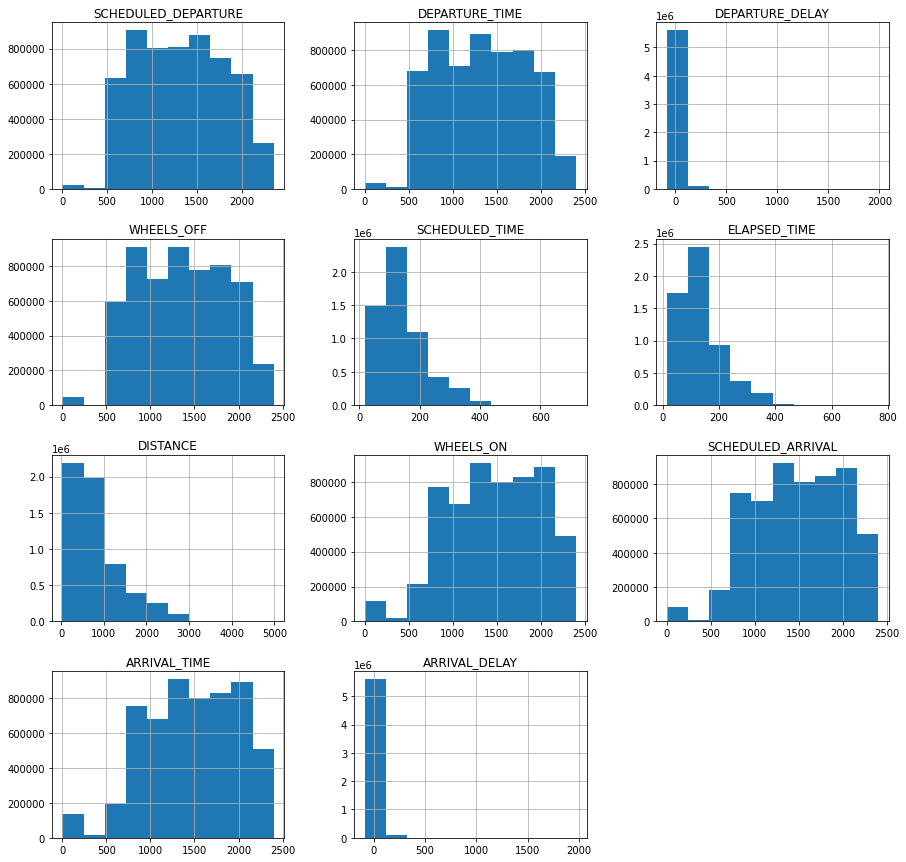

In [36]:
flights_time.hist(figsize=[15,15])
plt.show()

In [ ]:
#arrival_delay vai é a resposta

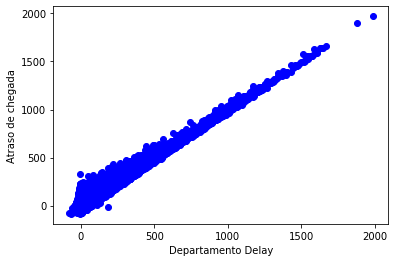

In [47]:
plt.scatter(flights_time.DEPARTURE_DELAY, flights_time.ARRIVAL_DELAY,  color='blue')
plt.xlabel("Departamento Delay") #correlação do atraso do departamento e atraso de chegada igual a 1
plt.ylabel("Atraso de chegada")
plt.show()